## Exercize 2.1

In [1]:
# 1
# Loading all the points in a numpy array

import numpy as np

def load_2dPoints(filename):
    with open(filename) as f:
        coordinates = f.readline().strip().split(',')
    return (np.loadtxt(filename, delimiter=',', skiprows=1), coordinates)
    
points, coordinates = load_2dPoints("./2D_gauss_clusters.txt")

print(f"Dimensions of data: {len(coordinates)}")
print(f"Coordinates: {coordinates}")
print(f"Shape of numpy array points: {points.shape}")

Dimensions of data: 2
Coordinates: ['x', 'y']
Shape of numpy array points: (5000, 2)


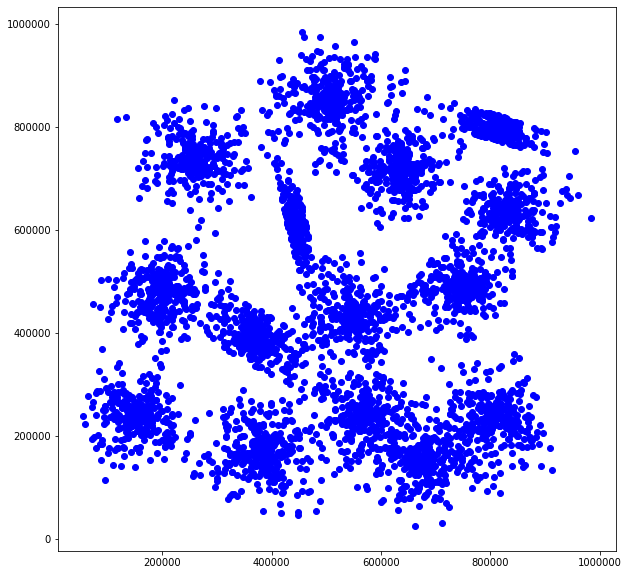

In [2]:
# 2
# Plot data with matplotlib
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

colors_15 = ["lime", "olive", "maroon", "lightblue", "orchid", "navy", "yellow", "cyan", "salmon", "purple", "gray", "ivory", "khaki", "indigo", "lavender"]
LABELS_COLOR_MAP = defaultdict(lambda: "")
LABELS_COLOR_MAP = {i:color for i, color in enumerate(colors_15)}
    
def draw_cluster(sizeX, sizeY, data, centr_oids=np.array([]), colorLabels="blue", save=False, out_name="out.png"):
    fig, ax = plt.subplots(figsize=(sizeX, sizeY))
    ax.scatter(data[:,0], data[:,1], c = colorLabels)
    if centr_oids.size:
        ax.scatter(centr_oids[:,0], centr_oids[:,1], marker="*", color="red")
    plt.show()
    if save:
        fig.savefig(out_name)

draw_cluster(10, 10, points, out_name="./figures/initialPoints.png")


In [6]:
# 3 # 4
# Implementation of k-means and output to csv file

import csv
from timeit import timeit
from collections import defaultdict
from math import sqrt

class KMeans:
    
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
        
    def fit_predict(self, X, plot_clusters=False, plot_step=5):
        """Run the K-means clustering on X.
    
        :param X: input data points, array, shape = (N,C).
        :return: labels : array, shape = N.
        """
        #Select randomly K points as initial centroids
        # Selects a random integer between 0 and the value of X.shape[0] (not included)
        randIndex = np.random.choice(X.shape[0], size = self.n_clusters, replace = False)
        # Use numpy fancy indexing to returns the rows (x,y) at each random specified index
        self.centroids = X[randIndex]
        
        #Form the clusters
        # In this version o cluster we have the points with a label on the third colum (0,1,...n_clusters)
        self.clusters = np.empty((X.shape[0],X.shape[1]+1), float)
        self.clusters[:,:-1] = X
        
        # Variable used to count actual number of iterations
        counter = self.max_iter
        
        while(counter > 0):
        
            # Computing distance between every point and every centroid
            #for point in X:
            for p_index, point in enumerate(X):
                
                distances_broadcasting = self.euclidean_distance(point)
                
                # Now find the index of the min distance in the list
                indexOfCluster = np.where(distances_broadcasting == np.min(distances_broadcasting))[0][0]
                # Add the point to the cluster with the label = indexOfClusters
                # Add the cluster label to the point
                self.clusters[p_index,-1] = indexOfCluster

            # Recompute centroids
            tmp_centroids = self.centroids.copy()
            #print(tmp_centroids)
            for indexOfCentroid, centroid  in enumerate(self.centroids):
                # Take for each centroids only the points belonging to its cluster with masking
                centroid_points = self.clusters[self.clusters[:,-1] == indexOfCentroid]
                #print(indexOfCentroid, centroid, self.centroids[indexOfCentroid])
                self.centroids[indexOfCentroid] = self.compute_centroid(centroid_points[:,0], centroid_points[:,1])

                
            # Check if the new centroids are equal to the previous ones
            if np.array_equal(self.centroids, tmp_centroids):
                # Actual number of iterations
                iterations = self.max_iter - counter +1
                print(f"Only {iterations} iteration needed")
                break;
            
                
            if plot_clusters and ~(counter % plot_step):
                colors = [LABELS_COLOR_MAP[label] for label in self.clusters[:,-1]]
                draw_cluster(10, 10, X, self.centroids, colors)
                
            
            counter -= 1
            
    def euclidean_distance(self, point):
        return np.sqrt(np.sum((self.centroids - point)**2, axis=-1))
                       
    def compute_centroid(self, x, y):
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        return np.array([x_mean,y_mean])
    
    def get_centroids(self):
        return self.centroids

    def dump_to_file(self, filename):
        """Dump the evaluated labels to a CSV file."""
        with open(filename, mode='w') as f:
            fwriter = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            fwriter.writerow(["Id", "ClusterId"])
            for Id, point in enumerate(self.clusters):
                fwriter.writerow([Id, point[-1]])
        
    
k = 15
maxIter = 100
kmeans1 = KMeans(k,maxIter)
print(f"Time for the KMeans wiht k = {k} and max_iter = {maxIter} -> {timeit(lambda: kmeans1.fit_predict(points), number = 1)}")
print("")
kmeans1.dump_to_file("./clustering_result.csv")

Only 28 iteration needed
Time for the KMeans wiht k = 15 and max_iter = 100 -> 3.7808721829999996



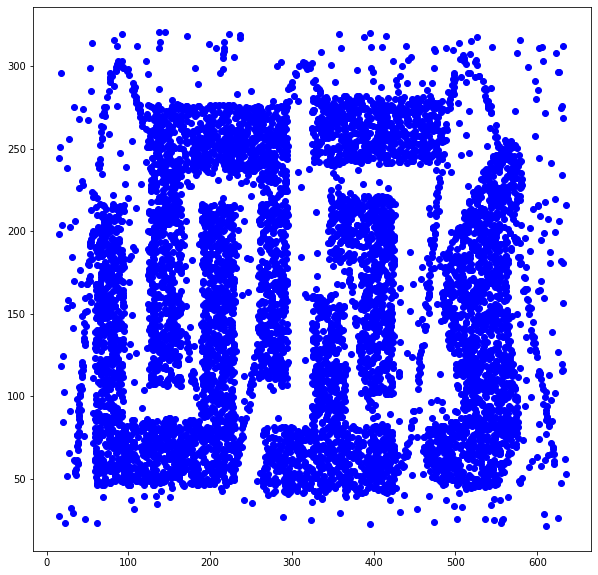

Only 19 iteration needed
Time for the KMeans wiht k = 6 and max_iter = 50 -> 4.209998116000008



In [7]:
# 5
# Cluster the other dataset
# Read data

points_chameleon, coordinates_chameleon = load_2dPoints("./chameleon_clusters.txt")

# Draw initial dataset
draw_cluster(10, 10, points_chameleon, save=True, out_name="./figures/initialPointsChameleon.png")


# Clustering
k_c = 6
maxIter_c = 50
kmeans2 = KMeans(k_c,maxIter_c)
print(f"Time for the KMeans wiht k = {k_c} and max_iter = {maxIter_c} -> {timeit(lambda: kmeans2.fit_predict(points_chameleon), number = 1)}")
print("")
kmeans2.dump_to_file("./clustering_result_chameleon.csv")

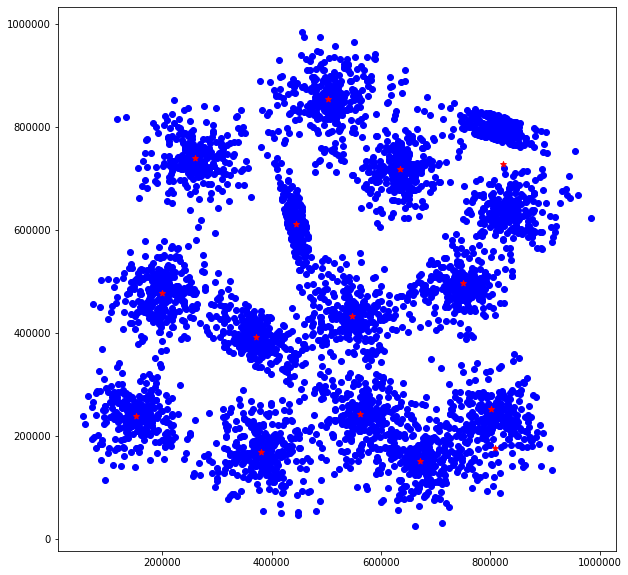

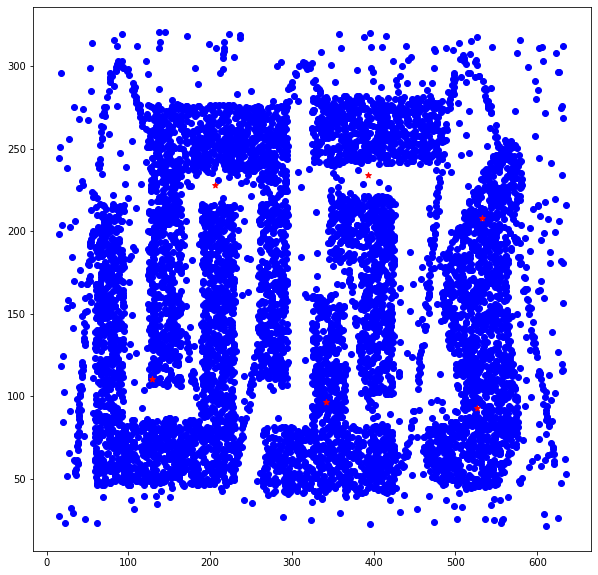

In [8]:
# 6 optional
# Plotting the clustering results
draw_cluster(10, 10, points, kmeans1.get_centroids(), save=True, out_name="./figures/gauss_cluster_centroids.png")

# Plotting the clustering results for chameleon
draw_cluster(10, 10, points_chameleon, kmeans2.get_centroids(), save=True, out_name="./figures/gauss_cluster_centroids_chameleon.png")


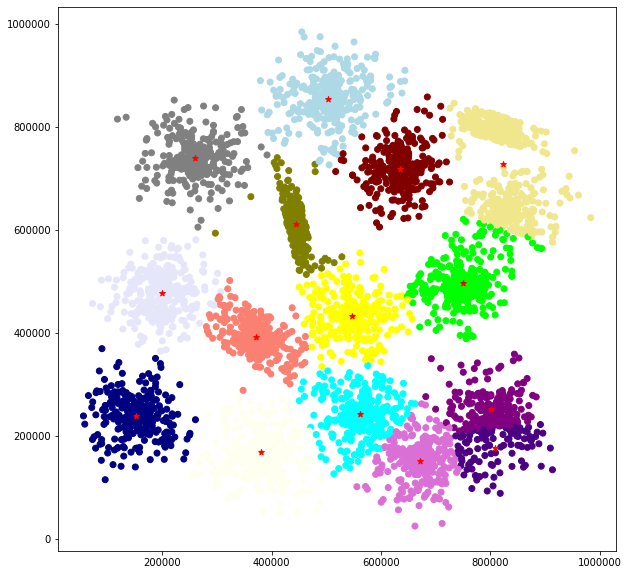

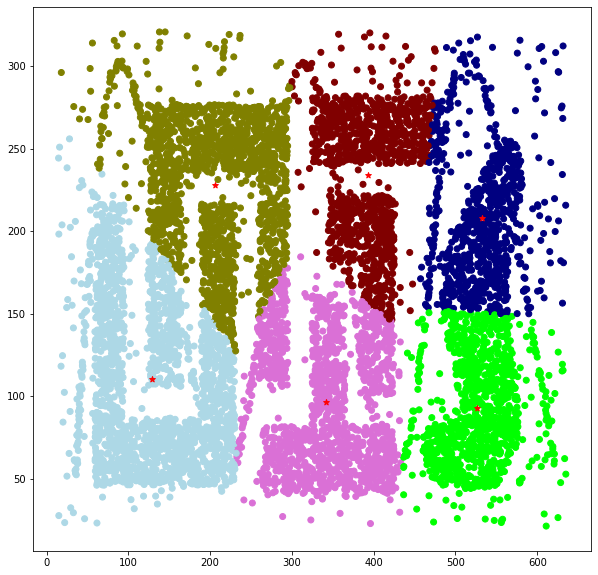

In [9]:
# 7 optional

def open_txtLabels(filename):
    with open(filename) as f:
        coordinates = f.readline().strip().split(',')
    return  np.loadtxt(filename, delimiter=',', skiprows=1), coordinates

# First dataset
labels, coordinates = open_txtLabels("./clustering_result.csv")

labels_color = [LABELS_COLOR_MAP[label] for label in labels[:,1]]

draw_cluster(10, 10, points, kmeans1.get_centroids(), labels_color, save=True, out_name="./figures/gauss_cluster.png")


# Second dataset
labels_c, coordinates_c = open_txtLabels("./clustering_result_chameleon.csv")

labels_color_c = [LABELS_COLOR_MAP[label] for label in labels_c[:,1]]

draw_cluster(10, 10, points_chameleon, kmeans2.get_centroids(), labels_color_c, save=True, out_name="./figures/chameleon_cluster.png")  



## Exercize 2.2